In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
itemids = [50817,51301,51144,51288,50889,50861,53084,50878,53088,50885,53089,51842,52024,51237,51675,51240,51002,51003,52642,50809,50931,52569,50983,52623,50811,51222,51640,50902,52535,50882,50813,52442,53154,52022,53138,50862,53085,220045,220210,227242,227243,223762,53134,51300,51704,52159,52647,51006,50825]

##### Bases

In [3]:
BASES_HOSP = "/scratch/haniel.botelho/physionet.org/files/mimiciv/2.2/hosp/"
BASES_ICU = "/scratch/haniel.botelho/physionet.org/files/mimiciv/2.2/icu/"
patient = "patients.csv"
admission = "admissions.csv"
diagnostics = "diagnoses_icd.csv"
icd_diagnostics = "d_icd_diagnoses.csv"
lab = "labevents.csv"
lab_items = "d_labitems.csv"
chart_items = "d_items.csv"
chart = "chartevents.csv"
icu = "icustays.csv"
id_dignoses = "d_icd_diagnoses.csv"

url_patient = BASES_HOSP + patient
url_admission = BASES_HOSP + admission
url_diagnostics = BASES_HOSP + diagnostics
url_icd_diagnostics = BASES_HOSP + icd_diagnostics
url_lab = BASES_HOSP + lab
url_lab_items = BASES_HOSP + lab_items
url_chart_items = BASES_HOSP + chart_items
url_chart = BASES_ICU + chart
url_icu = BASES_ICU + icu
url_id_dignoses = BASES_HOSP + id_dignoses

In [4]:
df_chartvents = pd.read_csv(url_chart)


In [5]:
df_labevents = pd.read_csv(url_lab)


In [6]:
df_admissions = pd.read_csv(url_admission)

In [16]:
df_diagnostics = pd.read_csv(url_diagnostics)

In [8]:
df_patients = pd.read_csv(url_patient) 

In [9]:
df_icu = pd.read_csv(url_icu)

In [10]:
df_id = pd.read_csv(url_id_dignoses)

In [24]:
df_icu = pd.merge(df_icu,df_patients,how = "inner",on = "subject_id")

In [25]:
df_icu

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,F,52,2180,2014 - 2016,2180-09-09
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,F,73,2186,2008 - 2010,2193-08-26
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,F,55,2157,2011 - 2013,NaN
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113,F,55,2157,2011 - 2013,NaN
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,F,46,2110,2011 - 2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73176,19999442,26785317,32336619,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2148-11-19 14:23:43,2148-11-26 13:12:15,6.950370,M,41,2146,2008 - 2010,NaN
73177,19999625,25304202,31070865,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2139-10-10 19:18:00,2139-10-11 18:21:28,0.960741,M,81,2138,2008 - 2010,NaN
73178,19999828,25744818,36075953,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2149-01-08 18:12:00,2149-01-10 13:11:02,1.790995,F,46,2147,2017 - 2019,NaN
73179,19999840,21033226,38978960,Trauma SICU (TSICU),Surgical Intensive Care Unit (SICU),2164-09-12 09:26:28,2164-09-17 16:35:15,5.297766,M,58,2164,2008 - 2010,2164-09-17


### Caracterização das entradas

In [38]:
df_pacientes = pd.DataFrame()
df_pacientes = pd.DataFrame(df_admissions['subject_id'].drop_duplicates())
df_pacientes['entrada'] = df_admissions.groupby('subject_id').count()['hadm_id'].values
df_pacientes

,subject_id,entrada
128,10000826,1
498,10001401,4
1016,10002013,2
1383,10002428,2
2003,10003019,1
...,...,...
4750696,19988077,1
4751611,19990427,2
4752276,19992202,1
4754791,19997367,2


In [39]:
entradas = pd.DataFrame(df_pacientes['entrada'].value_counts().sort_index()).reset_index()

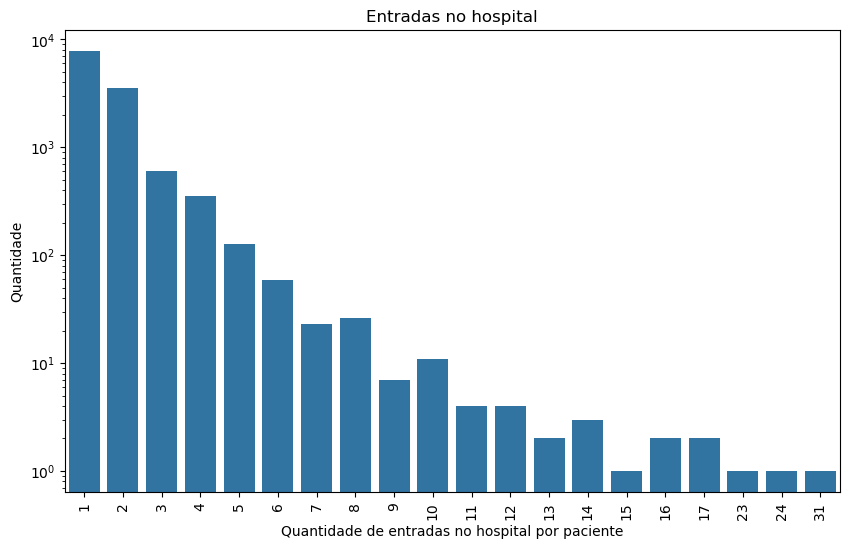

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x =entradas['entrada'],y=entradas['count'])
plt.yscale('log')
plt.xlabel('Quantidade de entradas no hospital por paciente')
plt.ylabel('Quantidade')
plt.title('Entradas no hospital')
plt.xticks(rotation=90)
plt.show()

In [43]:
bins = np.arange(0,250,10)
labels = np.array([f"{x}-{x+10}" for x in bins])


In [44]:
entradas["groups"] = labels[np.digitize(entradas["entrada"],bins)]
entradas = entradas.groupby("groups").sum().reset_index()


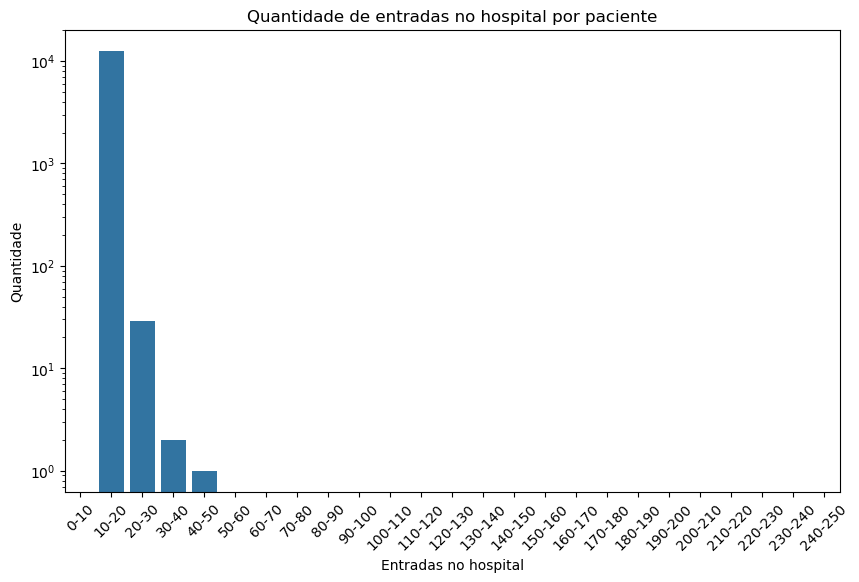

In [45]:
# Plotar os dados binarizados
plt.figure(figsize=(10, 6))
sns.barplot(x=entradas["groups"], y=entradas["count"],order=labels)
plt.yscale('log')
plt.xlabel('Entradas no hospital')
plt.ylabel('Quantidade')
plt.title('Quantidade de entradas no hospital por paciente')
plt.xticks(rotation=45)
plt.show()

### Exames

#### Seleção dos exames

In [46]:
def aggregate_events(df):
    itemid_map = {
        'Albumine': [52022, 53138, 50862, 53085],
        'Lactate': [50813, 52442, 53154],
        'Bicarbonate': [50813, 52442, 53154],
        'Chloride': [50902, 52535],
        'Hemoglobin': [50811, 51222, 51640],
        'Sodium': [50983, 52623],
        'Glucose': [50809, 50931, 52569],
        'Troponin': [51002, 51003, 52642],
        'Platelets': [51240,51704,52159],
        'INR': [51237, 51675],
        'Creatinine': [50813, 52442, 53154],
        'Bun': [51842,52647,51006],
        'Bilirubin': [50885, 53089],
        'AST': [50878, 53088],
        'ALT': [50861, 53084],
        'C_reactive': [50889],
        'ESR': [51288],
        'Bands': [51144],
        'WBC': [51301,53134,51300],
        'Oxygen_saturation': [50817],
        'Temperature': [223762],
        'Systolic_pressure': [227242, 227243],
        'Respiratory_rate': [220210],
        'Heart_rate': [220045]
    }
    
    for key, itemids in itemid_map.items():
        new_col = df['itemid'].isin(itemids) * df["value"]
        new_col[new_col == ""] = np.NaN
        new_col[new_col == "___"] = np.NaN
        df[key] = new_col
    return df


In [47]:
df_selected_labevents = df_labevents[['subject_id', 'hadm_id','charttime','itemid', 'value']]
df_selected_chartvents = df_chartvents[['subject_id', 'hadm_id','charttime','itemid', 'value']]
df_exams = pd.concat([df_selected_chartvents,df_selected_labevents],ignore_index=True)
df_exams = df_exams[df_exams['itemid'].isin(itemids)].copy()

In [ ]:
df_admissions

In [48]:
df_admissions = df_admissions[['subject_id', 'hadm_id', 'admittime']]
df_exams = pd.merge(df_exams,df_admissions,on = ['subject_id','hadm_id'],how = 'left')

KeyboardInterrupt: 

#### Calculo do offset dos exames

In [18]:
# Convertendo colunas para datetime
df_exams['charttime'] = pd.to_datetime(df_exams['charttime'])
df_exams['admittime'] = pd.to_datetime(df_exams['admittime'])
# Calculando os offsets
df_exams['offsettime'] = df_exams['charttime'] - df_exams['admittime']

In [19]:
df_exams = aggregate_events(df_exams)
df_exams.drop(['itemid','value'],axis = 1,inplace = True)

In [20]:
df_exams['days'] = (df_exams['offsettime'].dt.total_seconds()//(60*60*24)).values.astype(int)
df_exams['hours'] = (df_exams['offsettime'].dt.total_seconds()//(60*60)).values.astype(int)

/tmp/ipykernel_247168/479469759.py:1: RuntimeWarning: invalid value encountered in cast
  df_exams['days'] = (df_exams['offsettime'].dt.total_seconds()//(60*60*24)).values.astype(int)
/tmp/ipykernel_247168/479469759.py:2: RuntimeWarning: invalid value encountered in cast
  df_exams['hours'] = (df_exams['offsettime'].dt.total_seconds()//(60*60)).values.astype(int)


#### Visualização

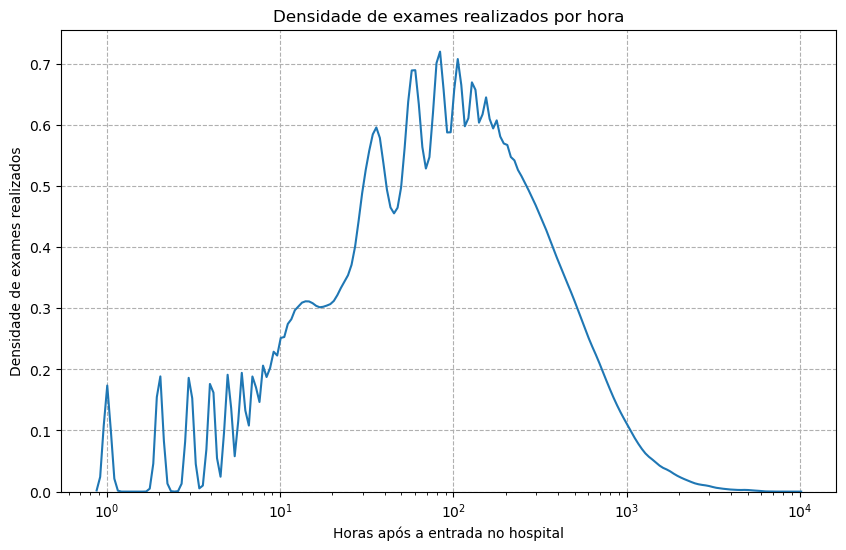

In [21]:
# Criar o gráfico de linhas
plt.figure(figsize=(10,6))
sns.kdeplot(df_exams[df_exams['hours']>0]['hours'], log_scale=True)
plt.xlabel('Horas após a entrada no hospital')
plt.ylabel('Densidade de exames realizados')
plt.title('Densidade de exames realizados por hora')
plt.grid(True, which="major", ls="--")
plt.show()


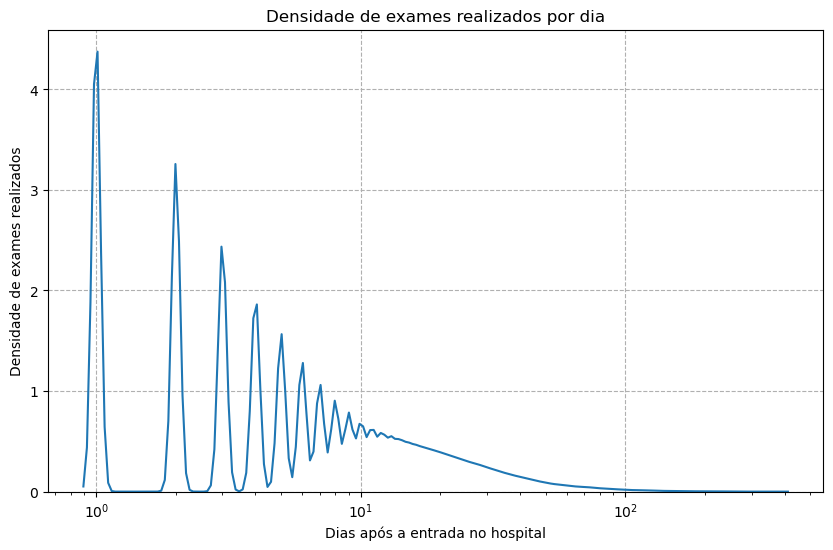

In [22]:
# Criar o gráfico de linhas
plt.figure(figsize=(10,6))
sns.kdeplot(df_exams[df_exams['days']>0]['days'], log_scale=True)
plt.xlabel('Dias após a entrada no hospital')
plt.ylabel('Densidade de exames realizados')
plt.title('Densidade de exames realizados por dia')
plt.grid(True, which="major", ls="--")
plt.show()


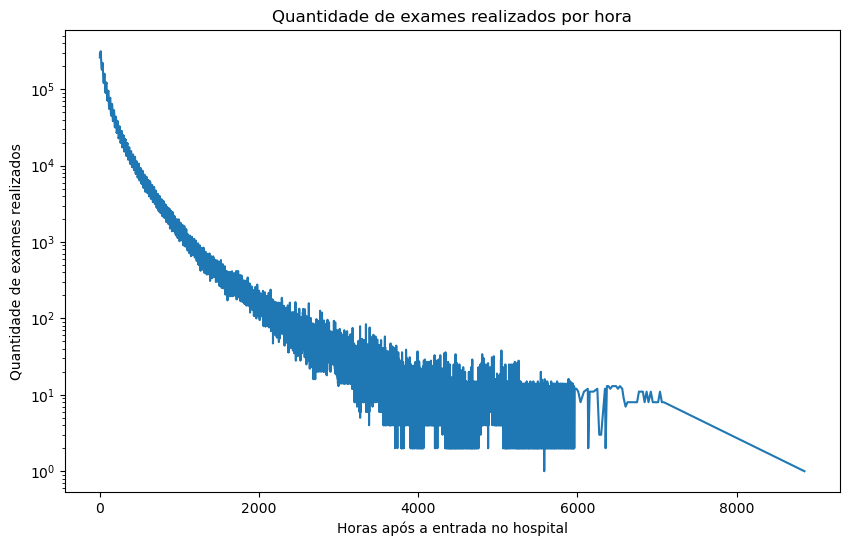

In [23]:
hourly_counts = df_exams[df_exams['hours']>0]['hours'].value_counts().sort_index()

# Criar o gráfico de linhas com o eixo y em escala logarítmica
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.yscale('log')
plt.xlabel('Horas após a entrada no hospital')
plt.ylabel('Quantidade de exames realizados')
plt.title('Quantidade de exames realizados por hora')
plt.show()

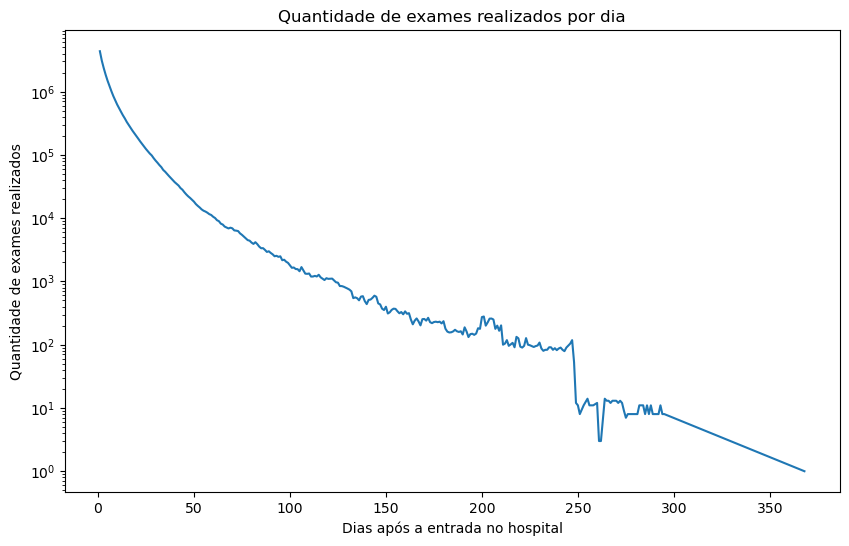

In [24]:
days_counts = df_exams[df_exams['days']>0]['days'].value_counts().sort_index()

# Criar o gráfico de linhas com o eixo y em escala logarítmica
plt.figure(figsize=(10, 6))
plt.plot(days_counts.index, days_counts.values)
plt.yscale('log')
plt.xlabel('Dias após a entrada no hospital')
plt.ylabel('Quantidade de exames realizados')
plt.title('Quantidade de exames realizados por dia')
plt.show()

#### Cálculo dos nulos


In [25]:
def stats(delta):
    df_exams_filtrado = df_exams[df_exams['admittime']!= 'NaT']
    df_stats = df_exams_filtrado[(df_exams_filtrado['hours']>0) & (df_exams_filtrado['hours']<=delta)]
    pacientes_que_fizeram_exame = df_stats.groupby(['subject_id','hadm_id']).apply(lambda x: x.notna().any(),include_groups=False)
    qtd_pacientes_que_fizeram_exame = pacientes_que_fizeram_exame.sum()

    total_patients = len(df_admissions[['subject_id','hadm_id']])
    df_stats = pd.DataFrame((total_patients-qtd_pacientes_que_fizeram_exame)/total_patients).reset_index()
    df_stats.columns = ["exams","porcentagem_de_nulos"]
    return df_stats["exams"],df_stats["porcentagem_de_nulos"]

In [26]:
def tratamento(df):
    df.loc[:,df.columns!="exams"] *= 100
    df.loc[:,df.columns!="exams"] = df.loc[:,df.columns!="exams"].round(2)
    df.loc[:,df.columns!="exams"] = df.loc[:,df.columns!="exams"].astype(str) + '%'
    return df


In [27]:
colunas,null_stats = stats(24)
df_stats = pd.DataFrame(colunas)
df_stats["porcentagem_de_nulos_24h"] = null_stats
_,null_stats = stats(48) 
df_stats["porcentagem_de_nulos_48h"] = null_stats
_,null_stats = stats(72)
df_stats["porcentagem_de_nulos_72h"] = null_stats
df_stats = tratamento(df_stats)
df_stats

/tmp/ipykernel_247168/2011754202.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['29.33%' '29.33%' '29.33%' '86.08%' '90.11%' '90.11%' '35.46%' '34.7%'
 '43.66%' '86.09%' '100.0%' '100.0%' '63.28%' '90.11%' '35.06%' '76.61%'
 '76.21%' '76.04%' '99.32%' '98.95%' '96.75%' '35.6%' '96.75%' '99.15%'
 '99.9%' '87.56%' '87.53%' '29.33%' '29.33%']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:,df.columns!="exams"] = df.loc[:,df.columns!="exams"].astype(str) + '%'
/tmp/ipykernel_247168/2011754202.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['24.96%' '24.96%' '24.96%' '82.51%' '88.61%' '88.61%' '29.72%' '28.54%'
 '38.74%' '84.82%' '100.0%' '100.0%' '57.63%' '88.61%' '29.27%' '72.66%'
 '72.06%' '71.94%' '99.03%' '98.56%' '95.83%' '29.1%' '95.91%' '98.95%'
 '99.87%' '86.62%' '86.6%' '24.96

,exams,porcentagem_de_nulos_24h,porcentagem_de_nulos_48h,porcentagem_de_nulos_72h
0,charttime,29.33%,24.96%,24.56%
1,admittime,29.33%,24.96%,24.56%
2,offsettime,29.33%,24.96%,24.56%
3,Albumine,86.08%,82.51%,80.96%
4,Lactate,90.11%,88.61%,87.79%
5,Bicarbonate,90.11%,88.61%,87.79%
6,Chloride,35.46%,29.72%,29.21%
7,Hemoglobin,34.7%,28.54%,28.0%
8,Sodium,43.66%,38.74%,38.24%
9,Glucose,86.09%,84.82%,84.33%


#### Análise pacientes septicos

In [ ]:
df_diagnostics = df_diagnostics['subject_id','hadm_id','icd_code']

In [44]:
df_exams = pd.merge(df_exams,df_diagnostics,how = 'left',on = ['subject_id','hadm_id'])

: 